In [646]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import os

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
from scipy.stats import boxcox
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import log_loss, accuracy_score, f1_score, plot_confusion_matrix, confusion_matrix

from imblearn.over_sampling import SMOTE

seed = 1

le = LabelEncoder()

In [647]:
path = 'C:\\Users\\sunil\\Projects\\Machine Hack\\Merchandise Popularity Prediction\\Dataset'

train = pd.read_csv(path + '\\Train.csv')
test = pd.read_csv(path + '\\Test.csv')
sample_sub = pd.read_csv(path + '\\sample_submission.csv')

In [648]:
target = 'popularity'
features = [col for col in train.columns if col not in [target]]

In [649]:
train[target].replace({0:0, 1:1, 3:2, 4:3, 5:4}, inplace = True)

---
# Predicting For Duplicate Values

In [650]:
test[target] = None

In [651]:
def Fill_Duplicates(row):
    tmp = train[ (train['Store_Ratio'] == row['Store_Ratio']) &
                 (train['Basket_Ratio'] == row['Basket_Ratio']) &
                 (train['Category_1'] == row['Category_1']) &
                 (train['Store_Score'] == row['Store_Score']) &
                 (train['Category_2'] == row['Category_2']) &
                 (train['Store_Presence'] == row['Store_Presence']) &
                 (train['Score_1'] == row['Score_1']) & 
                 (train['Score_2'] == row['Score_2']) &
                 (train['Score_3'] == row['Score_3']) &
                 (train['Score_4'] == row['Score_4'])]
    if tmp.shape[0] == 0:
        return None
    return tmp[target].mode()[0]

In [652]:
test[target] = test.apply(lambda x: Fill_Duplicates(x), axis = 1)

In [653]:
test.isna().sum()

Store_Ratio          0
Basket_Ratio         0
Category_1           0
Store_Score          0
Category_2           0
Store_Presence       0
Score_1              0
Score_2              0
Score_3              0
Score_4              0
time                 0
popularity        8802
dtype: int64

In [654]:
filled_test_index = test[~test[target].isna()].index
filled_test_values = test[~test[target].isna()][target].to_list()

In [587]:
len(filled_test_values)

3338

---

---
# Store Ratio Analysis

In [79]:
store_1 = train[ train[target] == 1]['Store_Ratio'].unique()
store_2 = train[ train[target] == 2]['Store_Ratio'].unique()
store_3 = train[ train[target] == 3]['Store_Ratio'].unique()
store_4 = train[ train[target] == 4]['Store_Ratio'].unique()

In [80]:
# For Popularity 1
diff_1 = np.setdiff1d(store_1, store_2)
diff_2 = np.setdiff1d(store_1, store_3)
diff_3 = np.setdiff1d(store_1, store_4)

a = list(np.concatenate((diff_1, diff_2, diff_3)))

In [81]:
set_a = list(set(a))
store_ratio_for_1 = []
for i in set_a:
    if a.count(i) == 3:
        store_ratio_for_1.append(i)

In [82]:
# For Popularity 2
diff_1 = np.setdiff1d(store_2, store_1)
diff_2 = np.setdiff1d(store_2, store_3)
diff_3 = np.setdiff1d(store_2, store_4)

b = list(np.concatenate((diff_1, diff_2, diff_3)))

In [83]:
set_b = list(set(b))
store_ratio_for_2 = []
for i in set_b:
    if b.count(i) == 3:
        store_ratio_for_2.append(i)

In [84]:
# For Popularity 3
diff_1 = np.setdiff1d(store_3, store_1)
diff_2 = np.setdiff1d(store_3, store_2)
diff_3 = np.setdiff1d(store_3, store_4)

c = list(np.concatenate((diff_1, diff_2, diff_3)))

In [85]:
set_c = list(set(c))
store_ratio_for_3 = []
for i in set_c:
    if c.count(i) == 3:
        store_ratio_for_3.append(i)

In [86]:
# For Popularity 4
diff_1 = np.setdiff1d(store_4, store_1)
diff_2 = np.setdiff1d(store_4, store_2)
diff_3 = np.setdiff1d(store_4, store_3)

d = list(np.concatenate((diff_1, diff_2, diff_3)))

In [87]:
set_d = list(set(d))
store_ratio_for_4 = []
for i in set_d:
    if d.count(i) == 3:
        store_ratio_for_4.append(i)

In [88]:
def fill_by_store_ratio(x):
    if x in store_ratio_for_1:
        return 1
    elif x in store_ratio_for_2:
        return 2
    elif x in store_ratio_for_4:
        return 4
    return None

In [89]:
#test.loc[test[target].isna(), target] = test[ test[target].isna()]['Store_Ratio'].apply(lambda x : fill_by_store_ratio(x))

---
# Data Preprocessing

In [655]:
trn, val = train_test_split(train, test_size = 0.2, random_state = 1, stratify = train[target])

##### Input for model
X_trn, X_val = trn[features], val[features]

##### Target column
y_trn, y_val = trn[target], val[target]

##### Features for test data that we will be predicting
X_test = test[features]

In [656]:
clf = XGBClassifier(random_state = 1)
_ = clf.fit(X_trn, y_trn)

preds_val = clf.predict_proba(X_val)

log_loss(y_val, preds_val)

0.3983739765664552

In [657]:
clf = ExtraTreesClassifier(random_state = 1,max_depth = 35, n_estimators = 2000)
_ = clf.fit(X_trn, y_trn)

preds_val = clf.predict_proba(X_val)

log_loss(y_val, preds_val)

0.3436662428845033

In [658]:
preds = clf.predict_proba(X_test)

In [609]:
# Filling Probabilities for Manually Predicted Indexes
def Manual_Probability_Filling():
    for i, (index,target_value) in enumerate(zip(preds[filled_test_index], filled_test_values)):
        tmp_ls = []
        tmp_ls = [v for v in range(0,5) if v not in [target_value]]
        preds[filled_test_index[i]][int(target_value)] = 1
        for v in tmp_ls:
            preds[filled_test_index[i]][int(v)] = 0
    return 'Done'

In [610]:
#a = np.zeros((len(preds), 1))
#preds = np.append(a,preds, axis=1)

In [611]:
test[target] = test.apply(lambda x: Fill_Duplicates(x), axis = 1)

filled_test_index = test[~test[target].isna()].index
filled_test_values = test[~test[target].isna()][target].to_list()

Manual_Probability_Filling()

'Done'

In [612]:
test[target].isna().sum()

8802

In [614]:
sample = pd.DataFrame(preds)
sample.to_csv(path+'\\Extra_Tree.csv', index=False)

---
# Cross Validation

In [615]:
def cross_val(clf, train, test, features):
    N_splits = 5
    
    oofs = np.zeros((len(train), 5))
    preds = np.zeros((len(test), 5))
    preds_acc = np.zeros(len(train))
    
    target_col = train[target]
    folds = StratifiedKFold(N_splits, shuffle = True,random_state = seed)
    stratidied_target = pd.qcut(target_col, 10, labels=False, duplicates='drop')
    
    for index, (trn_idx, val_idx) in enumerate(folds.split(train, stratidied_target)):
        print(f'*********************Fold {index+1}*********************')
        
        ## Training Set
        X_trn, y_trn = train[features].iloc[trn_idx], train[target].iloc[trn_idx]
        
        ## validation Set
        X_val, y_val = train[features].iloc[val_idx], train[target].iloc[val_idx]
        
        ## Test Set
        X_test = test[features]
        
        ## Scaling Data
        scaler = StandardScaler()
        _ = scaler.fit(X_trn)
        X_trn = scaler.transform(X_trn)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
        
        ## Fitting
        _ = clf.fit(X_trn, y_trn)
        
        ############# Predicting
        
        ##Probabilities
        val_preds_probs = clf.predict_proba(X_val)
        test_preds_probs = clf.predict_proba(X_test)
        
        ## Classes
        val_preds = clf.predict(X_val)
        
        loss = log_loss(y_val, val_preds_probs)
        print(f'Log Loss is {loss}')
        print()
        oofs[val_idx] = val_preds_probs
        preds += test_preds_probs/N_splits
        preds_acc[val_idx] = val_preds
        
    total_loss = log_loss(target_col, oofs)
    print(f'Log Loss on All Train Set is {total_loss}')
    
    return oofs, preds, preds_acc

In [616]:
def run_gradient_boosting(clf, train, test, features, params):
    N_splits = 5
    
    oofs = np.zeros((len(train), 5))
    preds = np.zeros((len(test), 5))
    preds_acc = np.zeros(len(train))
    
    target_col = train[target]
    folds = StratifiedKFold(N_splits, shuffle = True,random_state = seed)
    stratidied_target = pd.qcut(target_col, 10, labels=False, duplicates='drop')
    
    for index, (trn_idx, val_idx) in enumerate(folds.split(train, stratidied_target)):
        print(f'*********************Fold {index+1}*********************')
        
        ## Training Set
        X_trn, y_trn = train[features].iloc[trn_idx], train[target].iloc[trn_idx]
        
        ## validation Set
        X_val, y_val = train[features].iloc[val_idx], train[target].iloc[val_idx]
        
        ## Test Set
        X_test = test[features]
        
        ## Scaling Data
        scaler = StandardScaler()
        _ = scaler.fit(X_trn)
        X_trn = scaler.transform(X_trn)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
        
        ## Fitting
        _ = clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)], **params)
        
        ############# Predicting
        
        ##Probabilities
        val_preds_probs = clf.predict_proba(X_val)
        test_preds_probs = clf.predict_proba(X_test)
        
        ## Classes
        val_preds = clf.predict(X_val)
        
        loss = log_loss(y_val, val_preds_probs)
        print(f'Log Loss is {loss}')
        print()
        oofs[val_idx] = val_preds_probs
        preds += test_preds_probs/N_splits
        preds_acc[val_idx] = val_preds
        
    total_loss = log_loss(target_col, oofs)
    print(f'Log Loss on All Train Set is {total_loss}')
    
    return oofs, preds, preds_acc

In [663]:
clf = ExtraTreesClassifier(random_state = 1999,max_depth = 35, n_estimators = 2000)
#clf = LGBMClassifier(random_state = 1, n_estimators=1000, learning_rate = 0.02, n_jobs=-1, colsample_bytree=0.6)
#clf = XGBClassifier(random_state = 1)

In [664]:
params = {'verbose': 100, 'early_stopping_rounds': 50}
oofs, preds, preds_acc = cross_val(clf, train, test, features)

*********************Fold 1*********************
Log Loss is 0.35467023914898205

*********************Fold 2*********************
Log Loss is 0.3355618504665808

*********************Fold 3*********************
Log Loss is 0.3602692932579629

*********************Fold 4*********************
Log Loss is 0.3564148237954403

*********************Fold 5*********************
Log Loss is 0.34957438694909715

Log Loss on All Train Set is 0.3512979323784184


In [665]:
confusion = confusion_matrix(train[target], preds_acc)

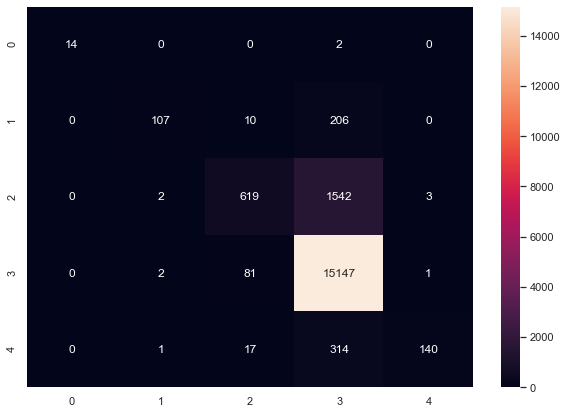

In [666]:
df_cm = pd.DataFrame(confusion, index = [i for i in "01234"],
                  columns = [i for i in "01234"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt = 'g')

In [667]:
test[target] = test.apply(lambda x: Fill_Duplicates(x), axis = 1)

filled_test_index = test[~test[target].isna()].index
filled_test_values = test[~test[target].isna()][target].to_list()

Manual_Probability_Filling()

'Done'

In [677]:
for index, a in enumerate(preds):
    for i in range(len(a)):
        preds[index][i] = float(preds[index][i])

In [678]:
preds

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 7.90000000e-03, 2.78034483e-02, 9.55596552e-01,
        8.70000000e-03],
       [0.00000000e+00, 4.50000000e-03, 5.57000000e-02, 9.18600000e-01,
        2.12000000e-02],
       ...,
       [0.00000000e+00, 3.90000000e-03, 1.58500000e-02, 9.79050000e-01,
        1.20000000e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [2.00000000e-04, 3.81000000e-02, 2.49600000e-01, 6.93500000e-01,
        1.86000000e-02]])

In [679]:
sample = pd.DataFrame(preds)
sample.to_csv(path+'\\cross_val.csv', index=False)

---
# Feature Engineering

In [436]:
def join_df(train, test):
    df = pd.concat([train, test], axis = 0).reset_index(drop = True)
    features = [col for col in df.columns if col not in [target]]
    
    return df, features

def split_df(df):
    train_proc, test_proc = df[:train.shape[0]].reset_index(drop=True), df[train.shape[0]:].reset_index(drop = True)
    features = [col for col in df.columns if col not in [target]]
    
    return train_proc, test_proc, features

---
### Feature Transformation

In [437]:
df, features = join_df(train, test)

In [438]:
df['Score_2'] = np.log(df['Score_2']+1)

In [439]:
df['time'] = np.log(df['time'])

In [440]:
train_proc, test_proc, features = split_df(df)

def get_df_agg(df):
    aggs = {
        'Store_Ratio' : ['min', 'max', 'nunique', 'size', ],
        'Basket_Ratio' : ['min', 'max', 'nunique', 'size'],
        'Store_Score' : ['min', 'max', 'nunique', 'size'],
        'Store_Presence': ['min', 'max', 'nunique', 'size'],
        'Category_2' : ['size'],
        'Score_1' : ['min', 'max', 'nunique', 'size'],
        'Score_2' : ['min', 'max', 'nunique', 'size'],
        'Score_3' : ['min', 'max', 'nunique', 'size'],
        'Score_4' : ['min', 'max', 'nunique', 'size'],
        'time' : ['min', 'max', 'size']
    }
    df_agg = df.groupby('Category_1').agg(aggs)
    df_agg.columns = ['_'.join(c).strip('_') for c in df_agg.columns]
    return df_agg

df_agg = get_df_agg(df)

df = pd.merge(left=df, right=df_agg, on = 'Category_1', how = 'left')

train, test, features = split_df(df)

In [441]:
df, features = join_df(train_proc, test_proc)

In [442]:
df['Mean_Score_1_Per_Popularity'] = df.groupby('Category_1')['Score_1'].transform('mean')

In [443]:
train_proc, test_proc, features = split_df(df)

In [369]:
params = {'verbose': 100, 'early_stopping_rounds': 50}
oofs, preds, preds_acc = run_gradient_boosting(clf, train_proc, test_proc, features, params)

*********************Fold 1*********************
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 0.446704
[200]	valid_0's multi_logloss: 0.430416
[300]	valid_0's multi_logloss: 0.420415
[400]	valid_0's multi_logloss: 0.413612
[500]	valid_0's multi_logloss: 0.409002
[600]	valid_0's multi_logloss: 0.406965
[700]	valid_0's multi_logloss: 0.405435
[800]	valid_0's multi_logloss: 0.405781
Early stopping, best iteration is:
[784]	valid_0's multi_logloss: 0.405349
Log Loss is 0.4053485372189556

*********************Fold 2*********************
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 0.433872
[200]	valid_0's multi_logloss: 0.416475
[300]	valid_0's multi_logloss: 0.406324
[400]	valid_0's multi_logloss: 0.40037
[500]	valid_0's multi_logloss: 0.397801
[600]	valid_0's multi_logloss: 0.396053
[700]	valid_0's multi_logloss: 0.395987
Early stopping, best iteration is:
[653]	valid_0's multi_logloss: 0.395818

# Binning

In [444]:
df, features = join_df(train_proc, test_proc)

In [454]:
df['Store_wise_Basket'] = df.groupby('Category_1')['Basket_Ratio'].transform('mean')
df['Store_wise_Basket'].fillna(999, inplace = True)

In [455]:
train_proc, test_proc, features = split_df(df)

In [462]:
train['Store_Ratio'].value_counts()

0.5320    55
0.7030    54
0.6090    52
0.6400    51
0.7050    50
          ..
0.0598     1
0.9540     1
0.0954     1
0.0570     1
0.0733     1
Name: Store_Ratio, Length: 1053, dtype: int64

In [466]:
train[ train['Store_Ratio'] == 0.7050]

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
9,0.705,0.2210,3,-11.474,0,0.938000,0.906000,0.1110,0.384,84.962,143131,3
79,0.705,0.3280,11,-13.355,0,0.118000,0.857000,0.1830,0.281,139.868,120000,3
312,0.705,0.8820,11,-3.201,0,0.000369,0.000001,0.0934,0.700,130.000,241667,3
574,0.705,0.7280,0,-11.413,0,0.014100,0.343000,0.2450,0.737,107.088,267787,4
583,0.705,0.6400,11,-6.928,0,0.023700,0.000000,0.2620,0.887,144.077,203760,3
639,0.705,0.7050,0,-7.043,1,0.501000,0.000000,0.4340,0.865,129.961,286616,3
704,0.705,0.7140,11,-6.390,0,0.024900,0.000000,0.2530,0.434,104.996,209733,3
1577,0.705,0.6160,1,-4.880,1,0.028900,0.000000,0.0827,0.463,115.478,196853,3
2279,0.705,0.4190,7,-9.198,1,0.592000,0.000403,0.1580,0.554,128.909,182964,3
2579,0.705,0.8980,5,-6.371,0,0.207000,0.001180,0.7020,0.657,136.282,212000,3


In [458]:
params = {'verbose': 100, 'early_stopping_rounds': 50}
oofs, preds, preds_acc = run_gradient_boosting(clf, train_proc, test_proc, features, params)

*********************Fold 1*********************
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 0.446245
[200]	valid_0's multi_logloss: 0.42968
[300]	valid_0's multi_logloss: 0.419931
[400]	valid_0's multi_logloss: 0.413085
[500]	valid_0's multi_logloss: 0.409202
[600]	valid_0's multi_logloss: 0.40746
Early stopping, best iteration is:
[609]	valid_0's multi_logloss: 0.407306
Log Loss is 0.40730595559899724

*********************Fold 2*********************
Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 0.435025
[200]	valid_0's multi_logloss: 0.418088
[300]	valid_0's multi_logloss: 0.40809
[400]	valid_0's multi_logloss: 0.401446
[500]	valid_0's multi_logloss: 0.397606
[600]	valid_0's multi_logloss: 0.396287
Early stopping, best iteration is:
[613]	valid_0's multi_logloss: 0.396057
Log Loss is 0.3960568881281105

*********************Fold 3*********************
Training until validation scores don't 

In [448]:
df['Store_wise_Basket'].unique()

array([0.29319487, 0.27543043, 0.58655882, ..., 0.00841   , 0.0804    ,
       0.144     ])

In [490]:
test[test[target].isna()].head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
748,0.0601,1.0000,2,-14.825,0,0.1210,0.976,0.9310,0.00001,53.689,161309,NaN
823,0.0937,0.1570,9,-18.874,1,0.8170,0.890,0.0940,0.05880,87.062,146624,NaN
911,0.0563,0.7990,10,-22.153,0,0.0236,0.928,0.5370,0.01210,54.263,181783,NaN
1005,0.0936,0.0697,9,-27.077,0,0.9720,0.915,0.0984,0.11100,62.749,209455,NaN
1151,0.0999,0.0604,0,-26.208,1,0.9470,0.955,0.1970,0.03960,71.476,413999,NaN


In [491]:
test.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.164,0.994,1,-23.718,0,0.12400,0.99100,0.7890,0.00001,127.602,236436,2.0
1,0.586,0.636,4,-7.710,1,0.00208,0.32200,0.1070,0.35500,136.337,253631,3.0
2,0.457,0.743,0,-7.591,1,0.40400,0.00931,0.2010,0.68800,154.902,215669,3.0
3,0.423,0.748,5,-9.832,1,0.03000,0.22100,0.1690,0.42800,93.977,325200,3.0
4,0.802,0.756,2,-10.791,0,0.08430,0.00765,0.0521,0.96300,131.715,288293,3.0
